In [5]:
import pandas as pd
import cv2
df = pd.read_csv('../frcnn_input.csv')

In [6]:
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,w,h,img_name,atts
0,0,74,101,22,133,64.0,105.0,23,16,163,176,150.0,153.0,161,195,img_n/Sheer_Pleated-Front_Blouse/img_00000001.jpg,[717 818]
1,1,40,55,12,73,39.0,67.0,8,8,19,32,91.0,93.0,89,103,img_n/Sheer_Pleated-Front_Blouse/img_00000002.jpg,[717 818]
2,2,36,51,13,76,22.0,53.0,14,11,16,19,123.0,120.0,92,136,img_n/Sheer_Pleated-Front_Blouse/img_00000003.jpg,[141 717 837 956]
3,3,45,62,16,97,49.0,69.0,12,10,109,109,86.0,86.0,117,121,img_n/Sheer_Pleated-Front_Blouse/img_00000004.jpg,[716]
4,4,56,70,17,100,59.0,91.0,18,14,106,128,157.0,158.0,121,175,img_n/Sheer_Pleated-Front_Blouse/img_00000005.jpg,[349 405 717 810]


In [7]:
img = cv2.imread('../' + df.loc[0,'img_name'])

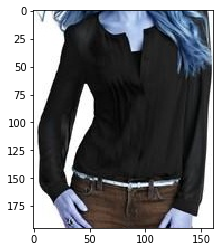

In [9]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.show()

In [21]:
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,w,h,img_name,atts
0,0,74,101,22,133,64.0,105.0,23,16,163,176,150.0,153.0,161,195,img_n/Sheer_Pleated-Front_Blouse/img_00000001.jpg,[717 818]
1,1,40,55,12,73,39.0,67.0,8,8,19,32,91.0,93.0,89,103,img_n/Sheer_Pleated-Front_Blouse/img_00000002.jpg,[717 818]
2,2,36,51,13,76,22.0,53.0,14,11,16,19,123.0,120.0,92,136,img_n/Sheer_Pleated-Front_Blouse/img_00000003.jpg,[141 717 837 956]
3,3,45,62,16,97,49.0,69.0,12,10,109,109,86.0,86.0,117,121,img_n/Sheer_Pleated-Front_Blouse/img_00000004.jpg,[716]
4,4,56,70,17,100,59.0,91.0,18,14,106,128,157.0,158.0,121,175,img_n/Sheer_Pleated-Front_Blouse/img_00000005.jpg,[349 405 717 810]


In [121]:
import numpy as np
def func(row,r_w,r_h, window):
    rois = []
    for i in range(1,7):
        x = int(row['x' + str(i)] * (float(r_w)/row['w'])) - (window/2)
        x = max([0,x])
        y = int(row['y' + str(i)] *(float(r_h)/row['h']))  - (window/2)
        y = max([0, y])
        w = x + window
        w = min([w, r_w -1])
        h = y + window
        h = min([h, r_h -1])
        rois.append([x,y, w, h])
    return np.array(rois)

In [122]:
df['landmarks'] = df.apply(lambda x: func(x,400,400, 60),axis = 1)

In [123]:
df.loc[0,'landmarks'].shape

(6, 4)

In [124]:
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,w,h,img_name,atts,landmarks
0,0,74,101,22,133,64.0,105.0,23,16,163,176,150.0,153.0,161,195,img_n/Sheer_Pleated-Front_Blouse/img_00000001.jpg,[717 818],"[[153, 17, 213, 77], [220, 2, 280, 62], [24, 3..."
1,1,40,55,12,73,39.0,67.0,8,8,19,32,91.0,93.0,89,103,img_n/Sheer_Pleated-Front_Blouse/img_00000002.jpg,[717 818],"[[149, 1, 209, 61], [217, 1, 277, 61], [23, 43..."
2,2,36,51,13,76,22.0,53.0,14,11,16,19,123.0,120.0,92,136,img_n/Sheer_Pleated-Front_Blouse/img_00000003.jpg,[141 717 837 956],"[[126, 11, 186, 71], [191, 2, 251, 62], [26, 1..."
3,3,45,62,16,97,49.0,69.0,12,10,109,109,86.0,86.0,117,121,img_n/Sheer_Pleated-Front_Blouse/img_00000004.jpg,[716],"[[123, 9, 183, 69], [181, 3, 241, 63], [24, 33..."
4,4,56,70,17,100,59.0,91.0,18,14,106,128,157.0,158.0,121,175,img_n/Sheer_Pleated-Front_Blouse/img_00000005.jpg,[349 405 717 810],"[[155, 11, 215, 71], [201, 2, 261, 62], [26, 2..."


In [127]:
df.loc[3,'landmarks']

array([[123,   9, 183,  69],
       [181,   3, 241,  63],
       [ 24, 330,  84, 390],
       [301, 330, 361, 390],
       [137, 254, 197, 314],
       [205, 254, 265, 314]])

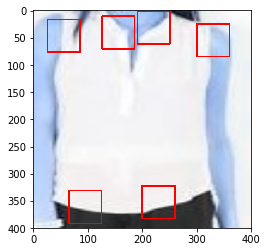

In [126]:
row = df.loc[2]
#for index, row in df.head(1).iterrows():
#print(row['x1'], row['w'])
img = cv2.imread('../'+row['img_name'])
img = cv2.resize(img, (400, 400))
#plt.imshow(img)
#img = cv2.circle(img, (row['landmarks'][0,0],row['landmarks'][0,1]), 5, (0,0,255), -1)
img = cv2.rectangle(img, (row['landmarks'][0,0],row['landmarks'][0,1]), (row['landmarks'][0,2],row['landmarks'][0,3]), (255,0,0), 2)
img = cv2.rectangle(img, (row['landmarks'][1,0],row['landmarks'][1,1]), (row['landmarks'][1,2],row['landmarks'][1,3]), (255,0,0), 2)
img = cv2.rectangle(img, (row['landmarks'][2,0],row['landmarks'][2,1]), (row['landmarks'][2,2],row['landmarks'][2,3]), (255,0,0), 2)

img = cv2.rectangle(img, (row['landmarks'][3,0],row['landmarks'][3,1]), (row['landmarks'][3,2],row['landmarks'][3,3]), (255,0,0), 2)

img = cv2.rectangle(img, (row['landmarks'][4,0],row['landmarks'][4,1]), (row['landmarks'][4,2],row['landmarks'][4,3]), (255,0,0), 2)

img = cv2.rectangle(img, (row['landmarks'][5,0],row['landmarks'][5,1]), (row['landmarks'][5,2],row['landmarks'][5,3]), (255,0,0), 2)




plt.imshow(img)



In [129]:
df.to_csv('rois.csv')

In [130]:
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,w,h,img_name,atts,landmarks
0,0,74,101,22,133,64.0,105.0,23,16,163,176,150.0,153.0,161,195,img_n/Sheer_Pleated-Front_Blouse/img_00000001.jpg,[717 818],"[[153, 17, 213, 77], [220, 2, 280, 62], [24, 3..."
1,1,40,55,12,73,39.0,67.0,8,8,19,32,91.0,93.0,89,103,img_n/Sheer_Pleated-Front_Blouse/img_00000002.jpg,[717 818],"[[149, 1, 209, 61], [217, 1, 277, 61], [23, 43..."
2,2,36,51,13,76,22.0,53.0,14,11,16,19,123.0,120.0,92,136,img_n/Sheer_Pleated-Front_Blouse/img_00000003.jpg,[141 717 837 956],"[[126, 11, 186, 71], [191, 2, 251, 62], [26, 1..."
3,3,45,62,16,97,49.0,69.0,12,10,109,109,86.0,86.0,117,121,img_n/Sheer_Pleated-Front_Blouse/img_00000004.jpg,[716],"[[123, 9, 183, 69], [181, 3, 241, 63], [24, 33..."
4,4,56,70,17,100,59.0,91.0,18,14,106,128,157.0,158.0,121,175,img_n/Sheer_Pleated-Front_Blouse/img_00000005.jpg,[349 405 717 810],"[[155, 11, 215, 71], [201, 2, 261, 62], [26, 2..."
